# Introduction to Scikit-Learn and Pandas
Artifical Intelligence and Machine Learning Symposium at OU  
Univeristy of Oklahoma Memorial Union Ballroom  
September 25, 2019  
Instructor: Monique Shotande <monique.shotande@ou.edu>  

## Overview: Data set up and understanding your data
The goal of Machine Learning is to have machines dynamically and/or 
independently, discover patterns within data. They should be able to
construct mathematical models from the data, independently adapt to 
new information, and make reasonable predictions.  

One of the first steps to making machines accomplish this (before building
models) is to carefully review the data for the machine to learn from, and 
to achieve optimal model performance. Machine learning models are only as 
good as the data that is used to train them, thus this pre-rocessing and 
set are crucial.

## Outline
    1. Observe the structure of the data
    
    2. Visualize the data
       + histograms
       + boxplots
       + scatter plots
       + grouping to visualize
    
    3. Clean the data
       + Handling missing data (e.g. NaNs or Inf)
       + Noisy data (particularly in time series data)
    
    4. Transform the data
      + Useful to make data more linear and/or normal
      + Scaling (e.g. [0,1] or [-1,-1])
      + Standardization, or normalization (i.e. mean=0 and std=1)
      + Log Transformations
    
    5. Visualize transformed data
    
    6. Feature selection
       + Determine significantly important features
       + Simplify model (make more interpretable)
       + Remove redundancies
       + Reduce computational complexity
       + Improve accuracy, precision, and skill
    

In [1]:
# IMPORT RELEVANT LIBRARIES AND DATA
import pandas as pd
import numpy as np
import itertools 
import time

from copy import deepcopy
from scipy import stats

# imports for Sci-kit Learn Datasets
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import RobustScaler, Normalizer

from matplotlib import rcParams, pyplot as plt

#%reload_ext autoreload
#%autoreload 2

rcParams['figure.figsize'] = (10.0, 10.0)

globalStart = time.time()
%matplotlib inline

# LOAD DATA
BOSTON HOUSING DATASET

In [2]:
""" TODO
Load boston housing dataset from sklearn library
"""
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
""" TODO
Detailed data set description
"""
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# DATA STRUCTURE

In [4]:
""" TODO
Setup variables
X is the m by n feature matrix
y is a m by 1 vector of the target values 
    m is the number of samples (i.e. the number of rows)
    n is the number of features (i.e. the number of columns)
"""
X = data.data
y = data.target.reshape(-1,1)

nsamples = X.shape[0]
nfeatures = X.shape[1]

feature_names = list(data.feature_names)
target_name = "MEDV"
all_varnames = feature_names[:] + [target_name]
            
print ("Data Dimensions")
print ("X:", X.shape, " y:", y.shape)

Data Dimensions
X: (506, 13)  y: (506, 1)


In [5]:
""" TODO
View the summary statistics of the data using pandas
"""
Xy = np.append(X, y, axis=1)
df_Xy = pd.DataFrame(Xy, columns=all_varnames)
df_Xy.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df_Xy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df_Xy.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


# VISUALIZE RAW DATA

In [8]:
def myplots(x, name):
    '''
    Helper function for plotting data visualizations.
    A figure is generated that consists of a sequence plot,
    a histogram, a boxplot, and a probability plot
    PARAMS:
        x: a single feature column
        name: feature name
    RETURNS:
        fig: the handle to the figure
    '''
    xplt = deepcopy(x)
    
    # Compute descriptive statistics
    med = np.nanmedian(xplt)
    mu = np.nanmean(xplt)
    sig = np.nanstd(xplt)
    mn = np.nanmin(xplt)
    mx = np.nanmax(xplt)

    # Plots
    fig = plt.figure(figsize=(14,3))
    
    # Sequence plot
    plt.subplot(1,4,1)
    plt.plot(xplt)
    plt.hlines(mu, 0, nsamples, colors='r', linestyles='dashed', label='mean')
    plt.xlabel("Sample Index")
    plt.ylabel(name)

    # Histogram
    plt.subplot(1,4,2)
    (n, b, p) = plt.hist(xplt, density=True)
    plt.plot((mu, mu), (0, np.max(n)), 'r--')
    plt.xlabel(name)
    
    # Boxplot
    plt.subplot(1,4,3)
    plt.boxplot(xplt, labels=[name])
    plt.ylabel(name)
    plt.tight_layout()
    
    # Probability Plot
    subplt = plt.subplot(1,4,4)
    (osm, osr), (slope, intercept, r) = stats.probplot(xplt, dist='norm', plot=subplt)
    plt.tight_layout()
    plt.show()
    
    print("myplots", name)
    return fig

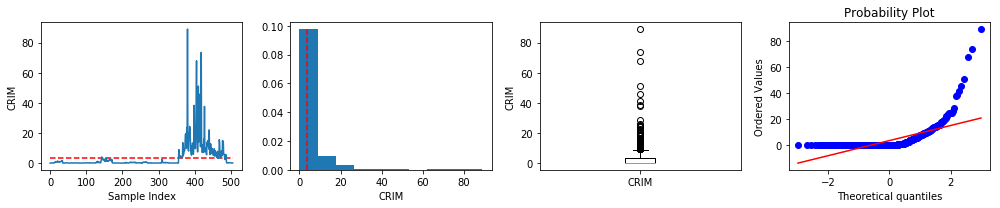

myplots CRIM


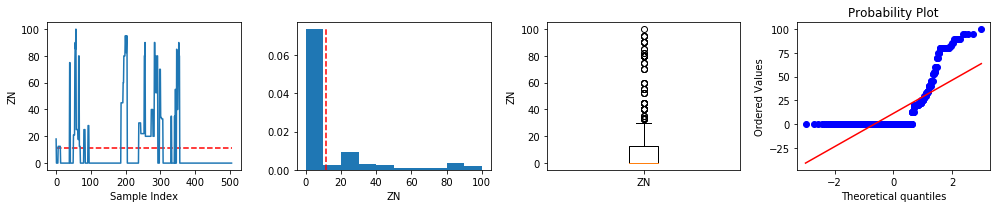

myplots ZN


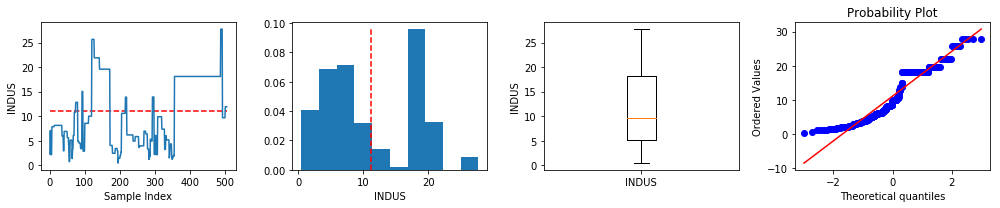

myplots INDUS


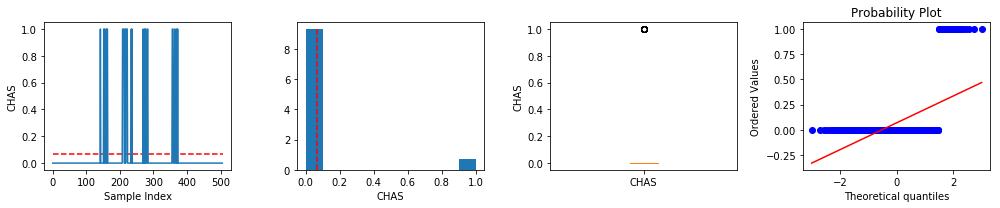

myplots CHAS


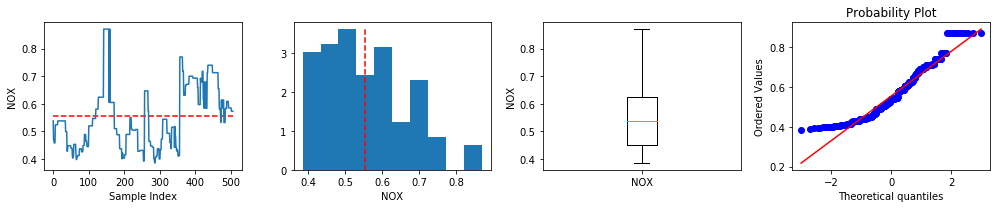

myplots NOX


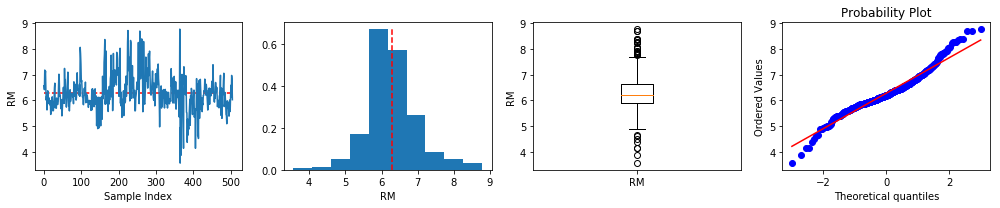

myplots RM


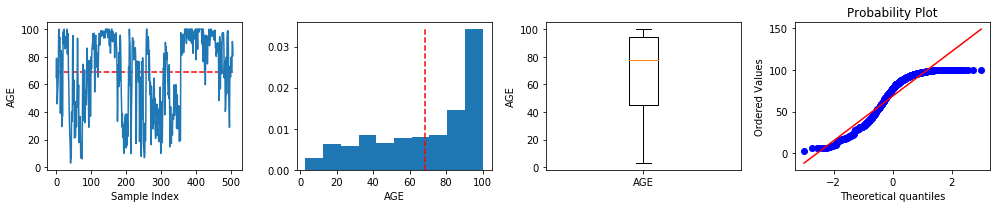

myplots AGE


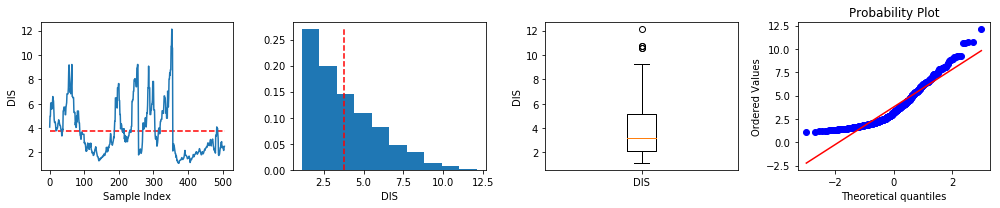

myplots DIS


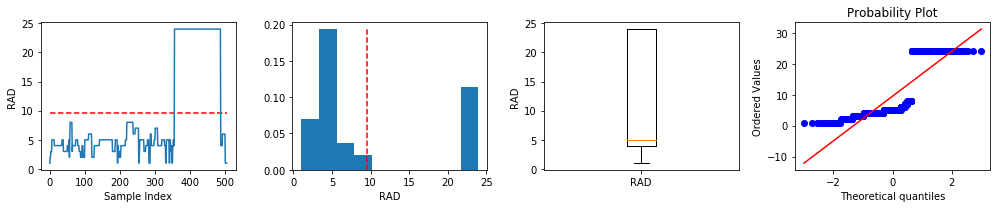

myplots RAD


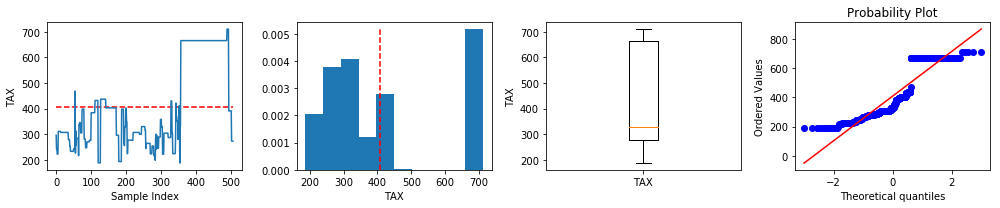

myplots TAX


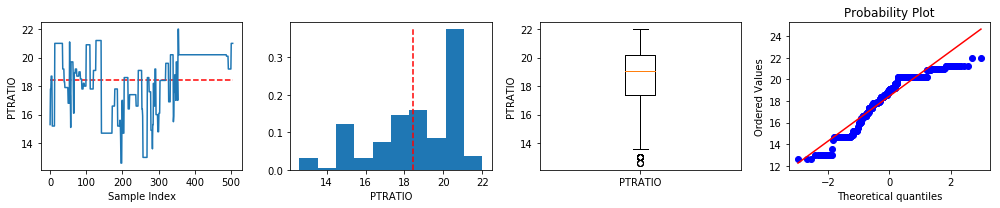

myplots PTRATIO


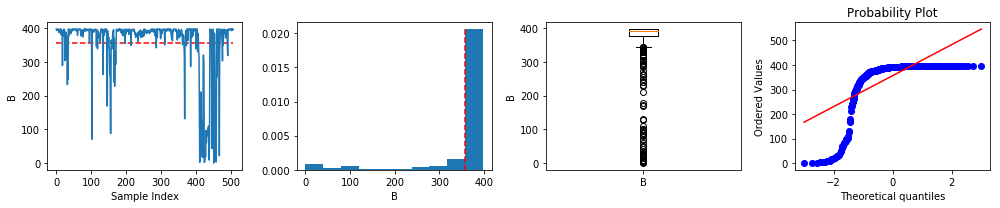

myplots B


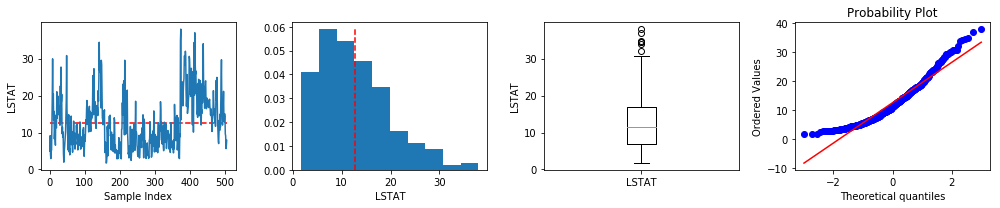

myplots LSTAT


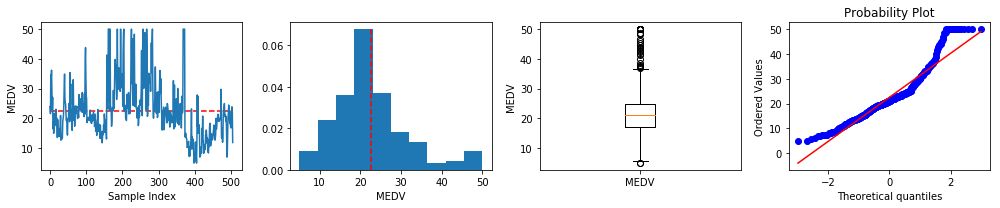

myplots MEDV
3. Elapsed Time:  8.971 s


In [9]:
def featureplots(X, feature_names):
    '''
    Plot all the features
    PARAMS:
        X: full data set
        feature_names: list of the feature names for the columns
    '''
    nsamples = X.shape[0]
    nfeatures = X.shape[1]
    for f, feature_name in enumerate(feature_names):
        x = X[:, f]
        myplots(x, feature_name)
# END DEF

# TODO
stime = time.time()
featureplots(X, feature_names)
featureplots(y.reshape(-1,1), [target_name])
etime = time.time()
print("3. Elapsed Time: %6.3f s" % (etime - stime))

# CLEAN DATA
* Handling missing data (e.g. NaNs, dropped values, etc.)
* Noisy data, (e.g. NaNs, Inf, dropped values, etc.)

In [10]:
"""
Check for missing data in the input and output data
"""
def anynans(X):
    return np.isnan(X).any()

def anyinfs(X):
    return np.isinf(X).any()

Xycat = np.append(X, y,axis=1)
print("Any NaNs?", anynans(Xycat))
print("Any Infs?", anyinfs(Xycat))

Any NaNs? False
Any Infs? False


In [11]:
# TODO: size, shape of X and y
X.size, X.shape, y.shape

(6578, (506, 13), (506, 1))

In [12]:
"""
Randomly injecting 13 NaNs
    for time series data, might interpolate between values or apply a filter
    for other data drop or fill valuse with mean, median, or other statistics
"""
sample_inds = np.random.randint(0, X.shape[0], size=13)
feature_inds = np.random.randint(0, X.shape[1], size=13)
sample_inds, feature_inds

(array([357, 235, 478, 464, 277, 336, 427, 249, 215, 262, 180,  18,  60]),
 array([11,  4, 11,  4,  8,  4,  8,  2,  3,  4,  8,  6,  5]))

In [13]:
""" TODO
Create copy of the data to corrupt
"""
Xnans = deepcopy(X)
Xnans[sample_inds, feature_inds] = np.nan
print("Any NaNs?", anynans(Xnans))
print("Any Infs?", anyinfs(Xnans))

Any NaNs? True
Any Infs? False


In [14]:
""" TODO
Handling NaNs for sample data through imputation.
This imputer will replace NaNs with the median value for the feature.
The median is choosen since it is robust to any outliers that might exist
within the data.
"""
median_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
median_imputer

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [15]:
""" TODO
Fitting the Imputer to the data computes the median for each feature column
"""
median_imputer.fit(Xnans)
featue_medians = np.array(median_imputer.statistics_).reshape(1, -1)
pd.DataFrame(featue_medians, columns=feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.25651,0.0,9.69,0.0,0.538,6.209,77.7,3.20745,5.0,330.0,19.05,391.475,11.36


In [16]:
""" TODO
Using the imputer's transform function fills in the NaNs with the corresponding 
feature median
"""
Xclean = median_imputer.transform(Xnans)
print("Any NaNs?", anynans(Xclean))
print("Any Infs?", anyinfs(Xclean))

Any NaNs? False
Any Infs? False


In [17]:
# TODO
Xclean_cat = np.append(Xclean, y, axis=1)
df = pd.DataFrame(Xclean_cat, columns=all_varnames)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Transform Data
In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers, transformers, or filters are useful to migiate bias extreme values
or outliers might introduce. Additionally, many machine learning algrotihms generalize better when data are between 0 and 1 or -1 and 1. Normalization of numeric variables helps the learning process by
preventing high magnitude differences between features dominate the model. For linear models, 0 centered
features can be more interpretable.

### [Standardize Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
$\frac{x_i - \bar{x}}{s_x}$

In [18]:
"""
Transform data through a scaler.
This scaler will standardize each the feature by subtracting the mean
and dividing by the standard deviation. StandardScaler assumes the data 
are normally distributed and not make the data more normal.
"""
standardizer = StandardScaler()
standardizer

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
"""
Fitting the Scaler to the data computes the mean and standard deviation
for each feature column
"""
standardizer.fit(Xclean)
params = np.vstack((feature_names, standardizer.mean_, standardizer.scale_))
pd.DataFrame(params.T, columns=['name', 'mean', 'std']).head()

,name,mean,std
0,CRIM,3.6135235573122535,8.593041351295769
1,ZN,11.363636363636363,23.299395694766027
2,INDUS,11.14434782608698,6.849852604337641
3,CHAS,0.0691699604743083,0.25374293496034855
4,NOX,0.5543551383399207,0.11558051341940422


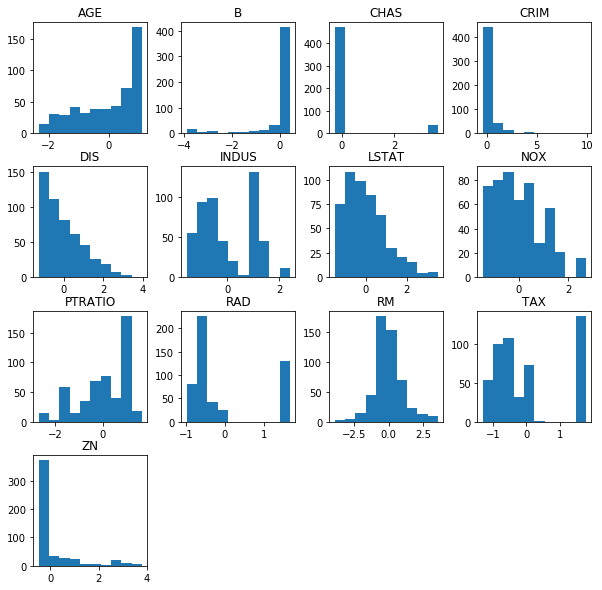

In [20]:
Xclean_std = standardizer.fit_transform(Xclean)
df = pd.DataFrame(Xclean_std, columns=feature_names)
df.hist(grid=False, figsize=(10,10))
a = 1

### [Min-Max Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
$\frac{x_i - min_x}{max_x - min_x}$

In [21]:
""" TODO
Transform data through a scaler.
This scaler will reduce the range of each the feature to be from 0 to 1
or -1 to 1 if there are negatives within the original range. For non-normal
distributions or distributions with small variance, this scaler is generally
better than the StandardScaler. The down fall to this method is its senstive 
to outliers on the transformation. Skewness is maintained.
"""
minmax_scaler = MinMaxScaler()
minmax_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
# TODO
Xclean_minmax = minmax_scaler.fit_transform(Xclean)
df = pd.DataFrame(Xclean_minmax, columns=feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


### [Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)
$\frac{x_i - Q_{1,x}}{Q_{3,x} - Q_{1,x}}$

In [23]:
""" TODO
Transform data through a scaler.
This scaler will reduce the range of each the feature to be from 0 to 1
or -1 to 1 if there are negatives within the original range. For non-normal
distributions or distributions with small variance, this scaler is generally
better than the StandardScaler and robust to outliers.
"""
robust_scaler = RobustScaler()
robust_scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [24]:
Xclean_robust = robust_scaler.fit_transform(Xclean)
df = pd.DataFrame(Xclean_robust, columns=feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.497114,-0.255624,0.285777,-0.20,-0.087855,-1.339286,0.260223,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287946,0.024540,0.569789,-0.15,-0.227390,-0.446429,0.260223,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.325637,-0.339468,0.569789,-0.15,-0.227390,-0.446429,0.064996,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.071647,-0.652352,0.924391,-0.10,-0.279070,-0.125000,0.151337,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.274024,-0.480573,0.924391,-0.10,-0.279070,-0.125000,0.260223,-0.602699


### [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)
$\frac{f1_i}{\sqrt(f1_i^2 + f2_i^2 + ... + fn_i^2)}$

In [25]:
""" TODO
Transform data through a normalizer.
This scaler will reduce the range of each feature to the same scale in 
the n-dimensional feature space. Reducing the feature space to a unit sphere. 
n is the number of features
"""
normalizer = Normalizer()
normalizer

Normalizer(copy=True, norm='l2')

In [26]:
Xclean_norm = normalizer.fit_transform(Xclean)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.497114,-0.255624,0.285777,-0.20,-0.087855,-1.339286,0.260223,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287946,0.024540,0.569789,-0.15,-0.227390,-0.446429,0.260223,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.325637,-0.339468,0.569789,-0.15,-0.227390,-0.446429,0.064996,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.071647,-0.652352,0.924391,-0.10,-0.279070,-0.125000,0.151337,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.274024,-0.480573,0.924391,-0.10,-0.279070,-0.125000,0.260223,-0.602699


### Log Transform Data
$ln(x_i)$

In [27]:
""" TODO
Transform data by computing the log.
This transform reduces the impact of outliers, making the feature
distribution less skew (and potentially more normal).
"""
Xclean_log = np.log(Xclean) # element wise natural log

subset_idx = [feature_names.index(name) for name in ['ZN', 'CHAS']]
Xclean_log[:, subset_idx] = Xclean[:, subset_idx]

print("Any NaNs?", anynans(Xclean_log))
print("Any Infs?", anyinfs(Xclean_log))

Any NaNs? False
Any Infs? False


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [28]:
df = pd.DataFrame(Xclean_log, columns=feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-5.064036,18.0,0.837248,0.0,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430
1,-3.600502,0.0,1.955860,0.0,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660
2,-3.601235,0.0,1.955860,0.0,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766
3,-3.430523,0.0,0.779325,0.0,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410
4,-2.672924,0.0,0.779325,0.0,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351


### COMPARING ALL SCLAERS AND TRANSFORMERS

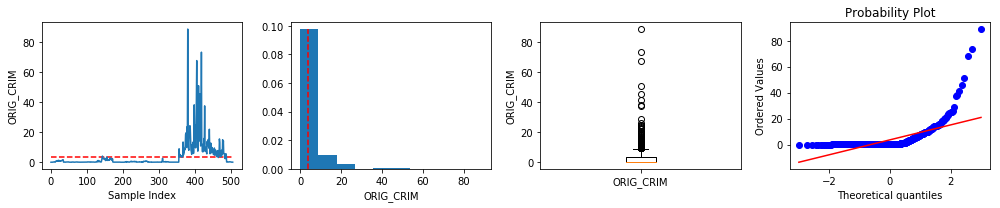

myplots ORIG_CRIM


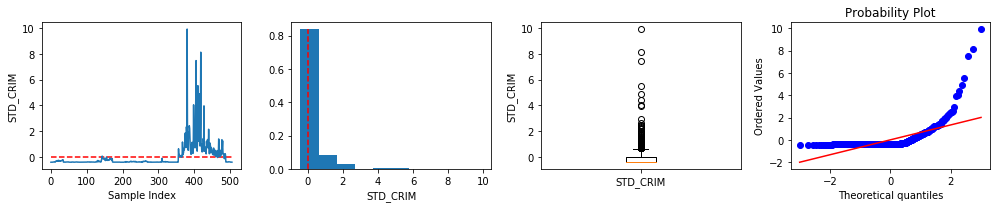

myplots STD_CRIM


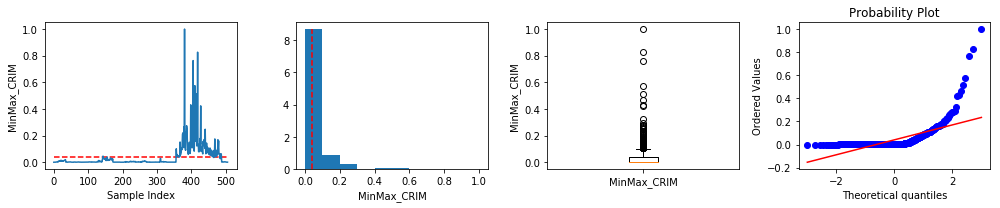

myplots MinMax_CRIM


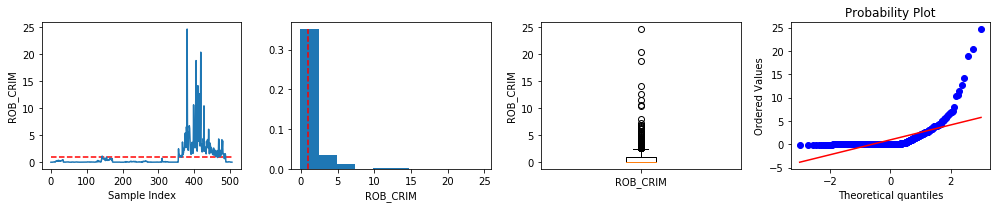

myplots ROB_CRIM


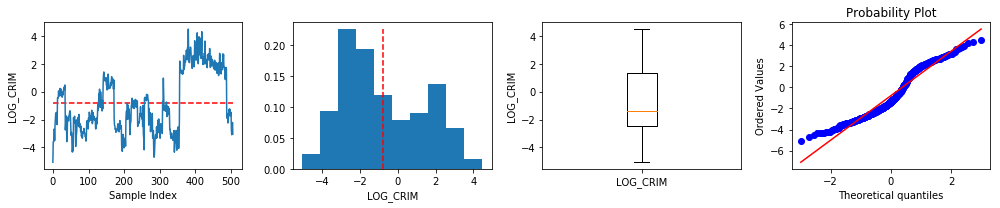

myplots LOG_CRIM


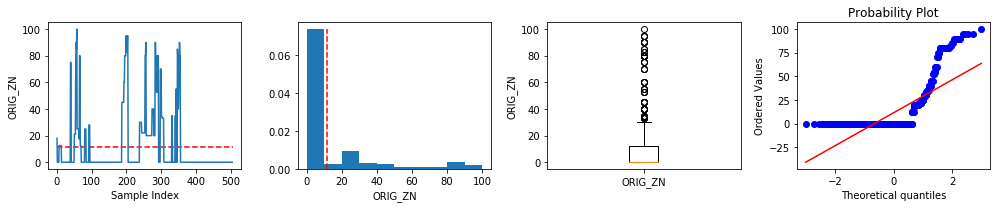

myplots ORIG_ZN


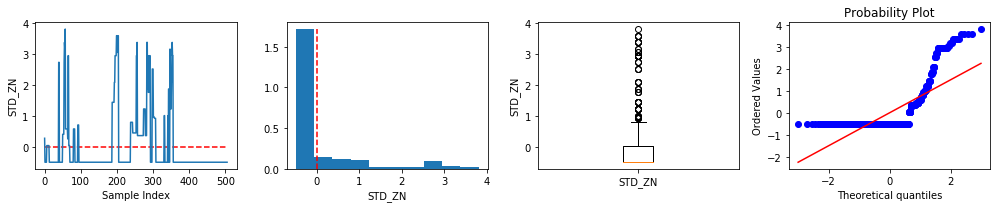

myplots STD_ZN


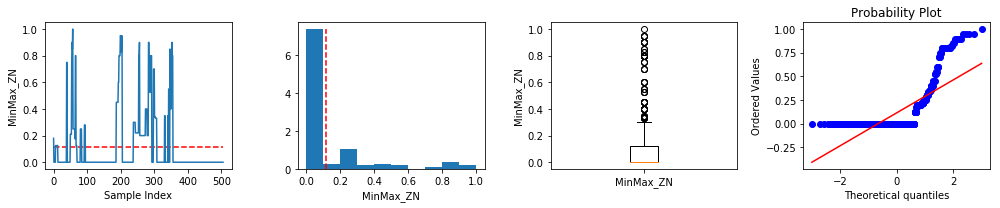

myplots MinMax_ZN


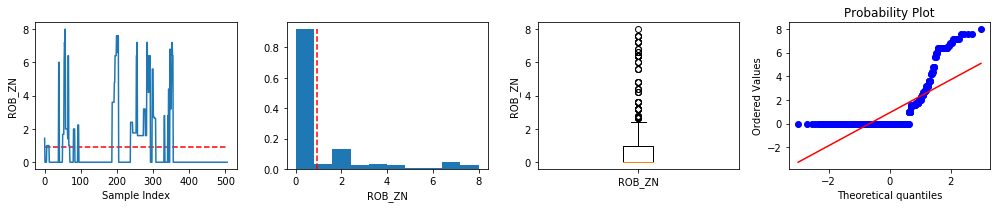

myplots ROB_ZN


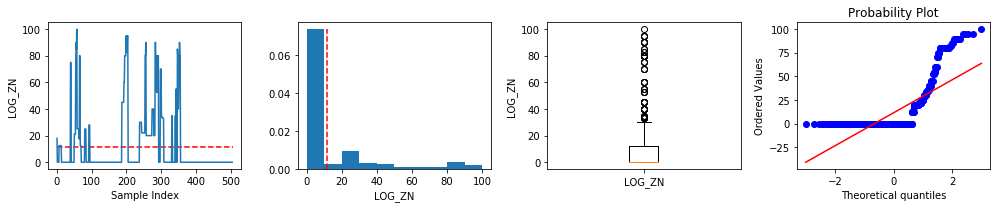

myplots LOG_ZN


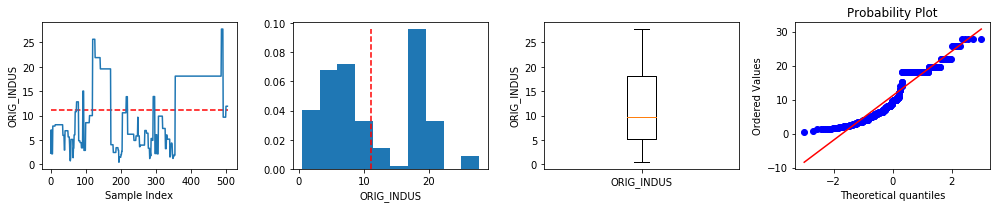

myplots ORIG_INDUS


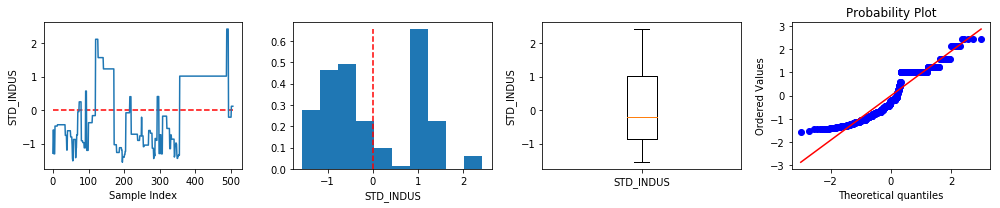

myplots STD_INDUS


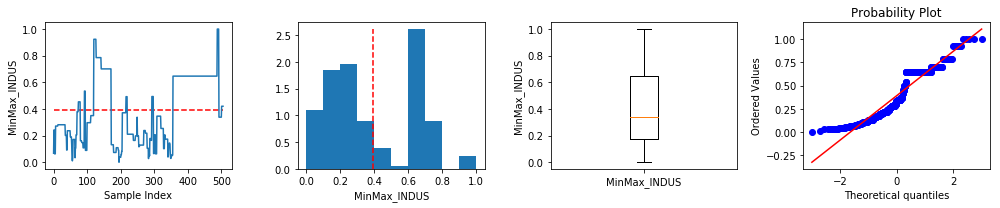

myplots MinMax_INDUS


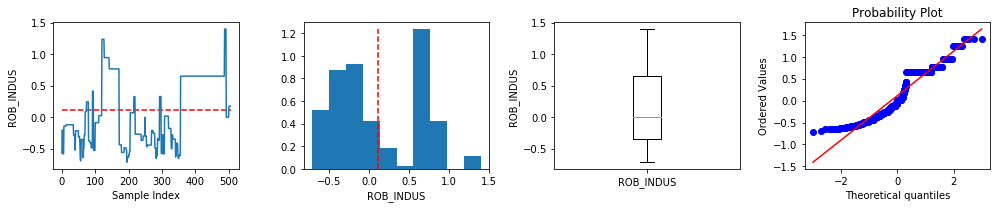

myplots ROB_INDUS


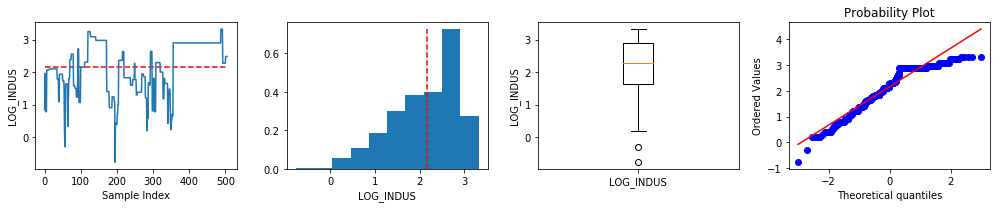

myplots LOG_INDUS


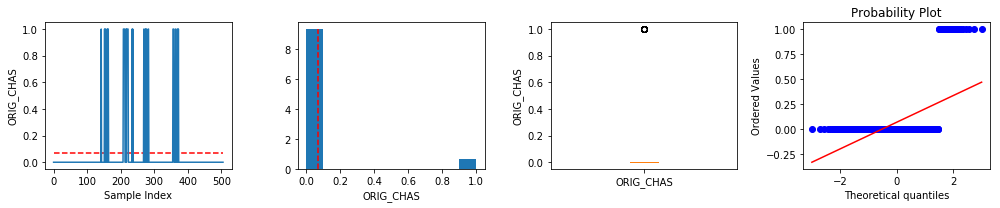

myplots ORIG_CHAS


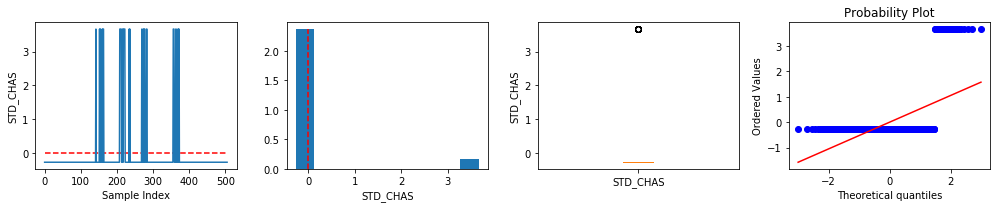

myplots STD_CHAS


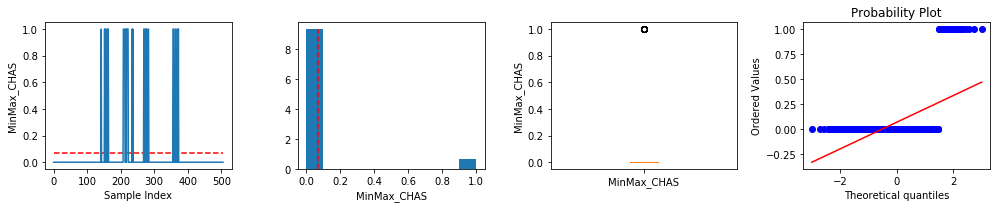

myplots MinMax_CHAS


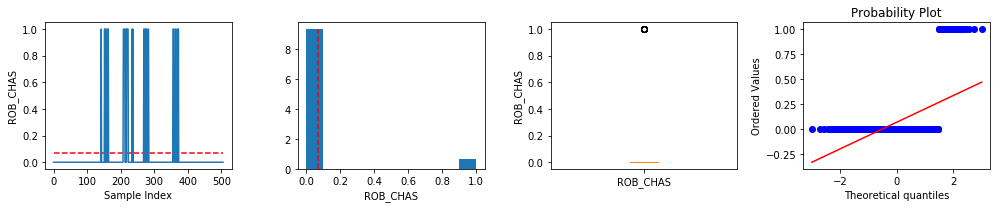

myplots ROB_CHAS


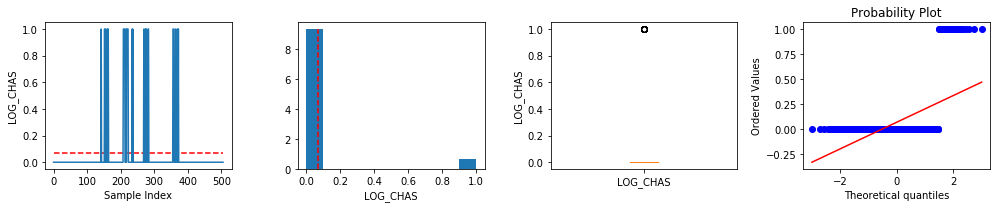

myplots LOG_CHAS


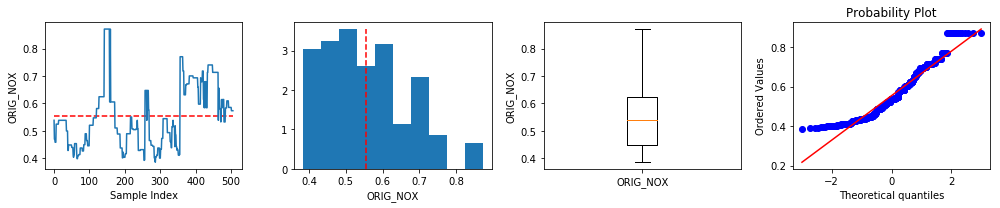

myplots ORIG_NOX


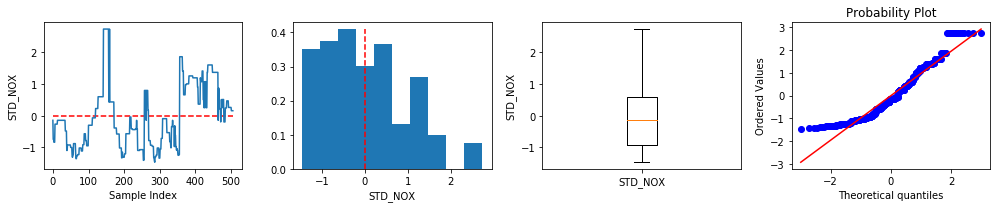

myplots STD_NOX


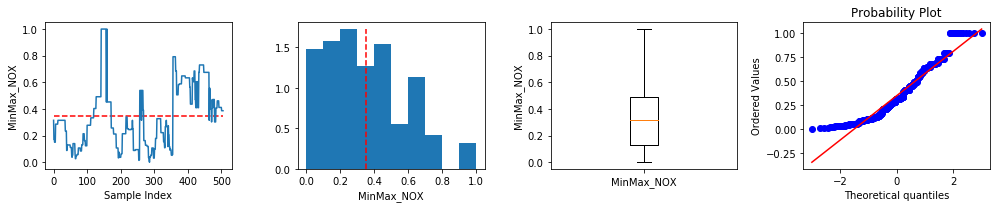

myplots MinMax_NOX


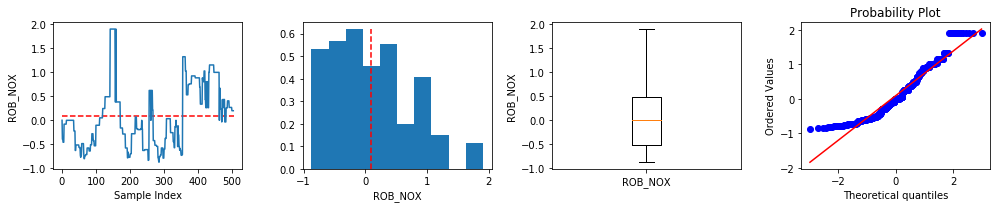

myplots ROB_NOX


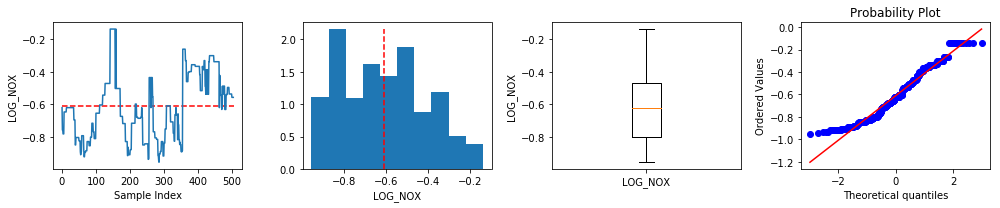

myplots LOG_NOX


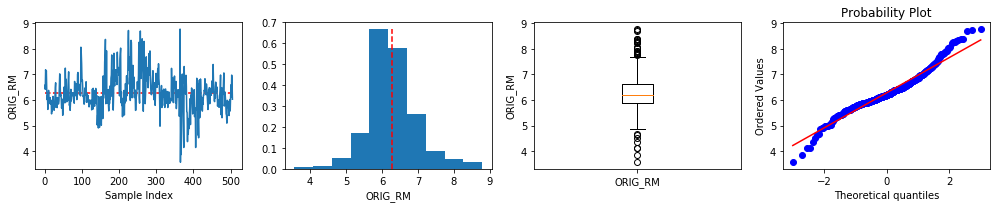

myplots ORIG_RM


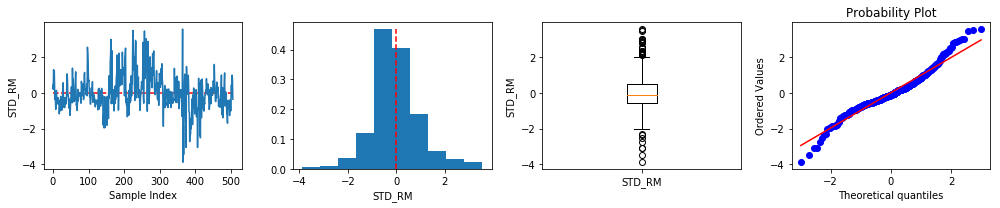

myplots STD_RM


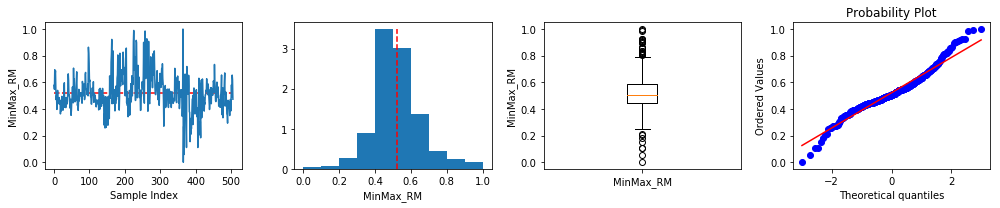

myplots MinMax_RM


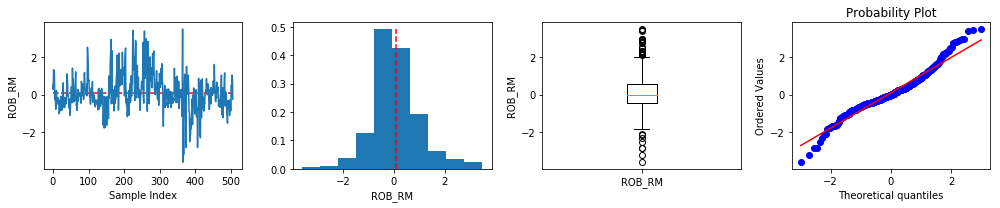

myplots ROB_RM


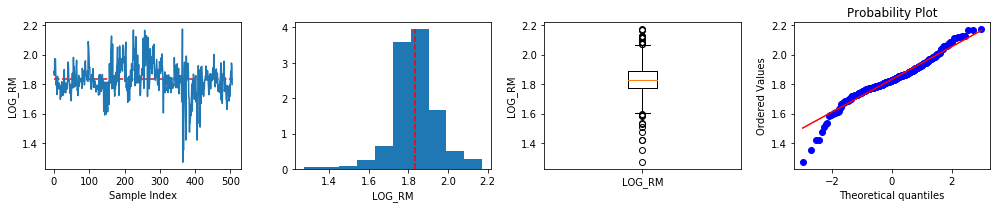

myplots LOG_RM


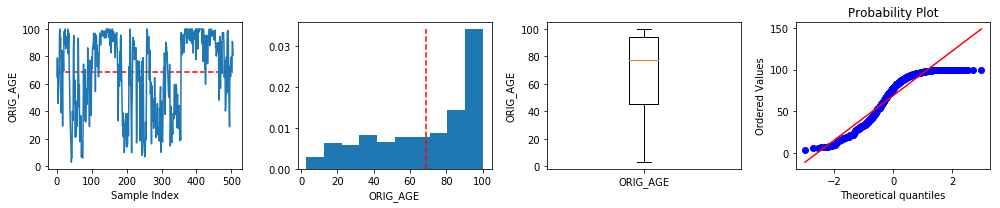

myplots ORIG_AGE


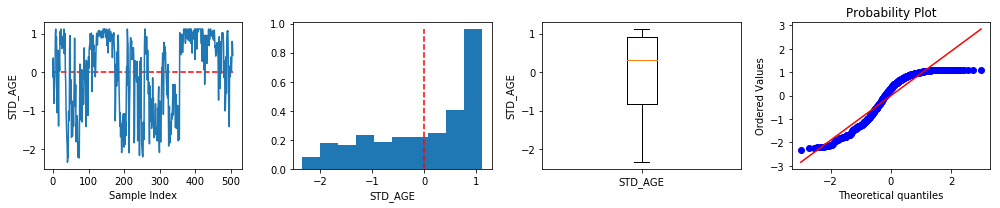

myplots STD_AGE


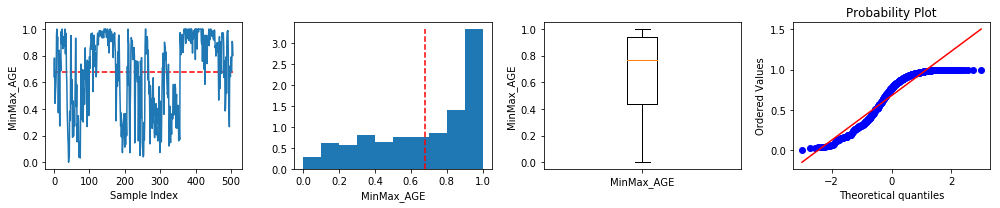

myplots MinMax_AGE


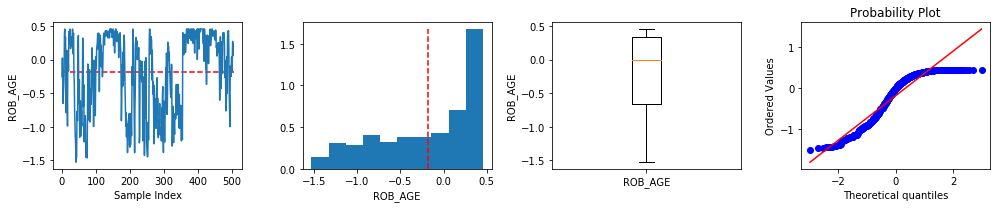

myplots ROB_AGE


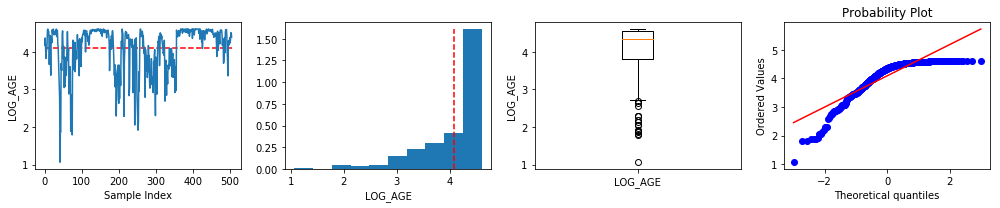

myplots LOG_AGE


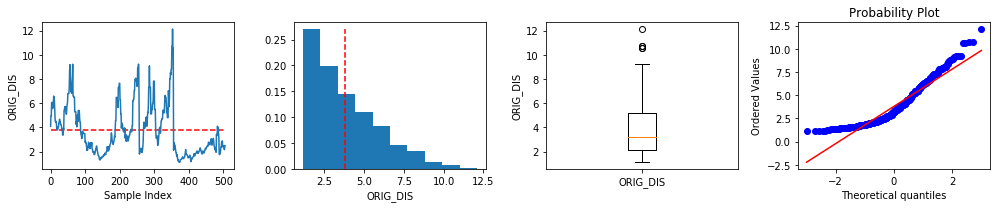

myplots ORIG_DIS


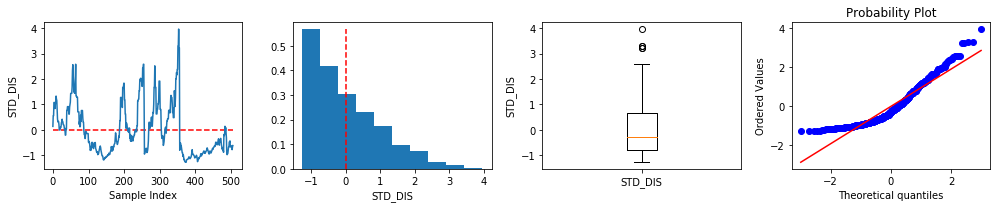

myplots STD_DIS


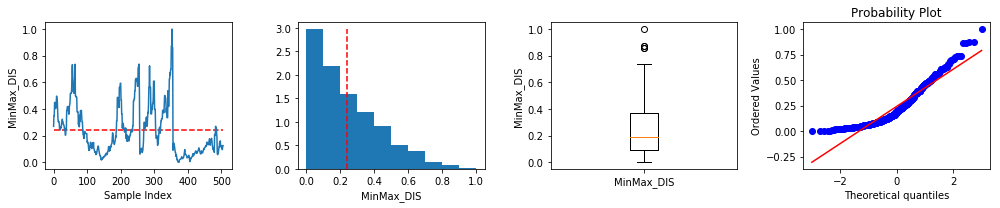

myplots MinMax_DIS


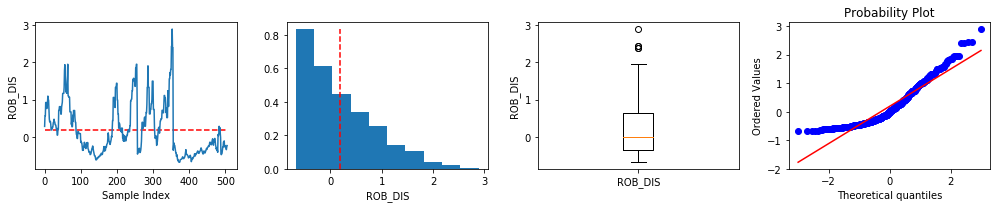

myplots ROB_DIS


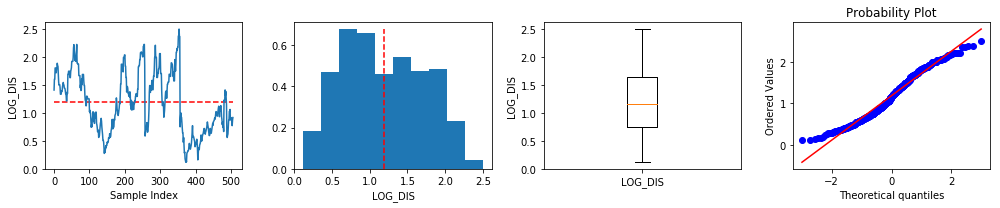

myplots LOG_DIS


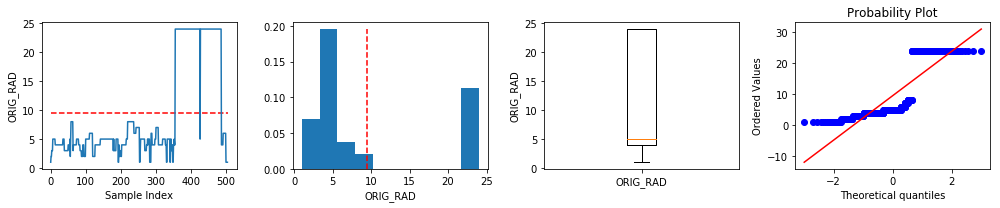

myplots ORIG_RAD


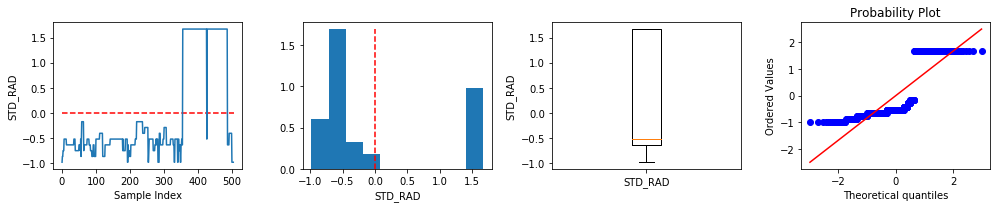

myplots STD_RAD


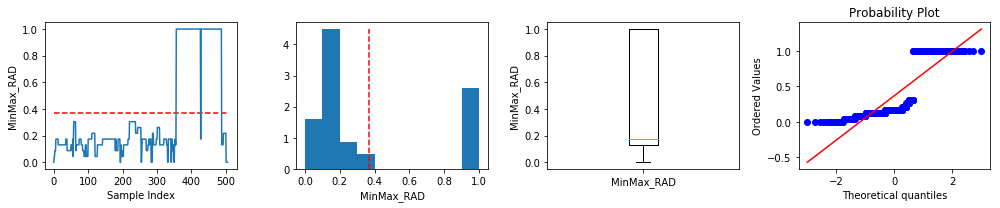

myplots MinMax_RAD


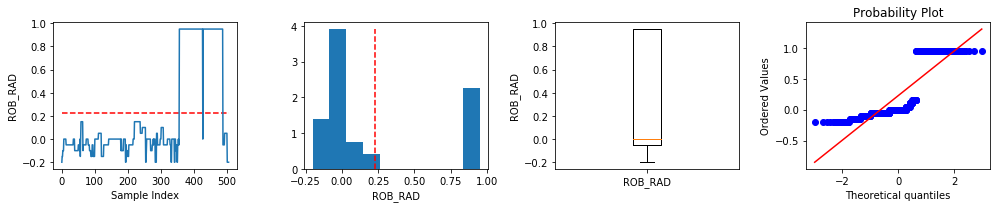

myplots ROB_RAD


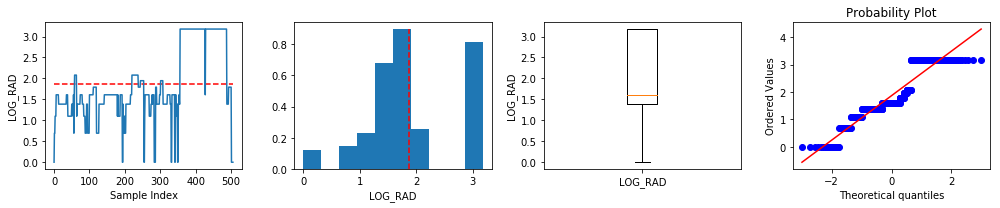

myplots LOG_RAD


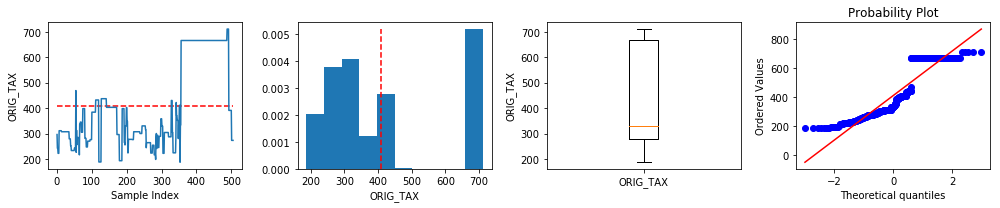

myplots ORIG_TAX


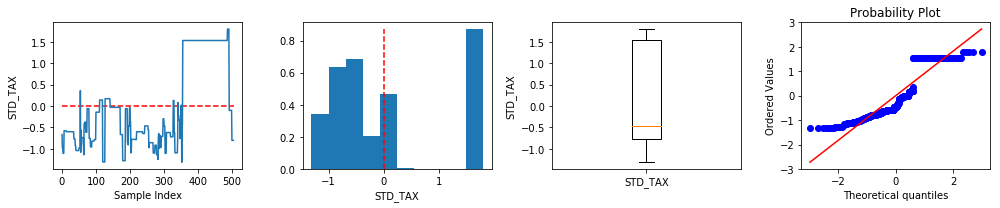

myplots STD_TAX


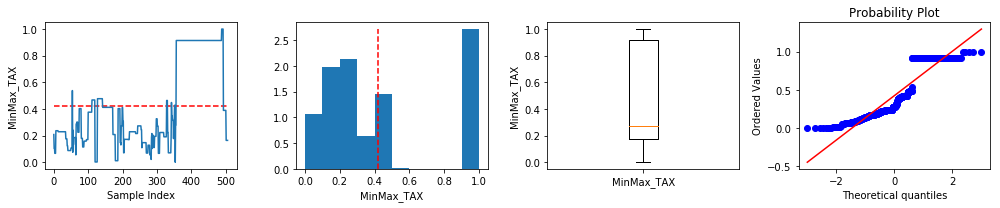

myplots MinMax_TAX


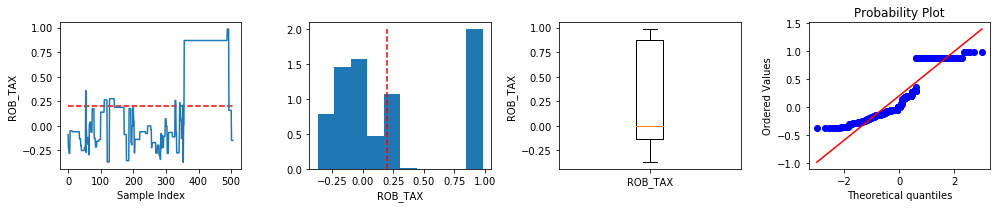

myplots ROB_TAX


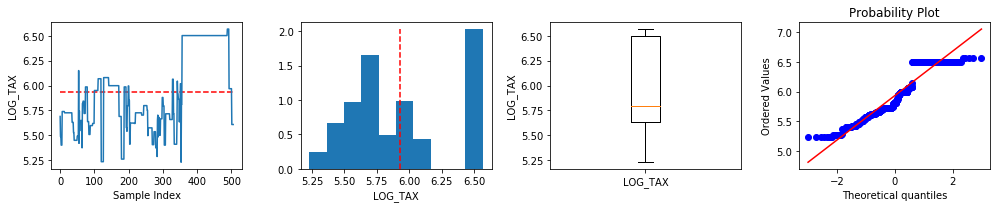

myplots LOG_TAX


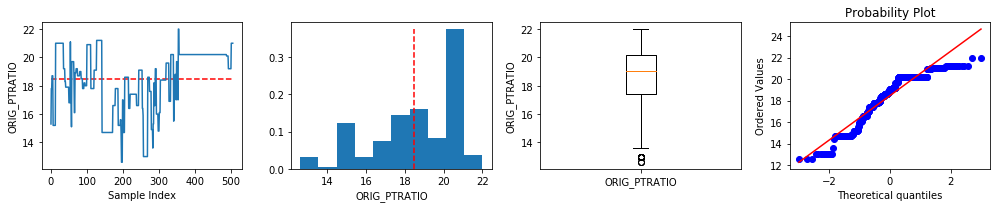

myplots ORIG_PTRATIO


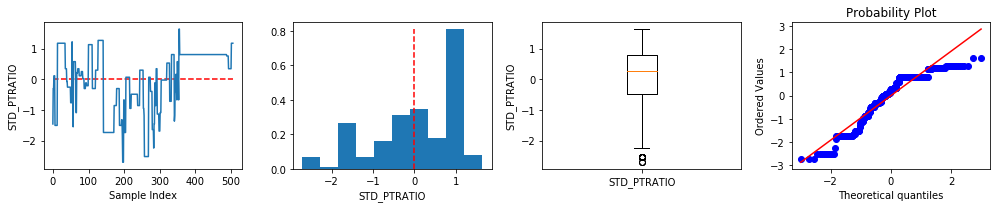

myplots STD_PTRATIO


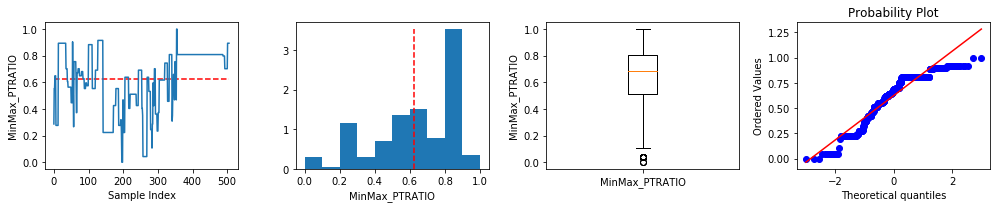

myplots MinMax_PTRATIO


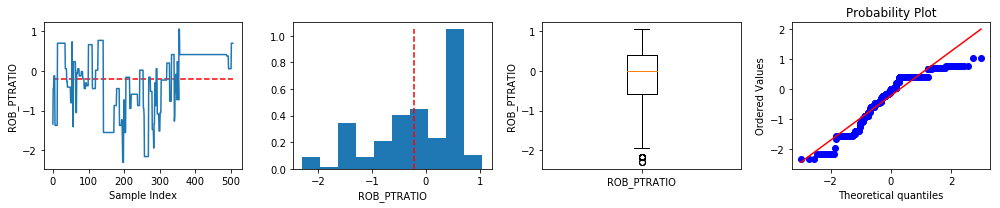

myplots ROB_PTRATIO


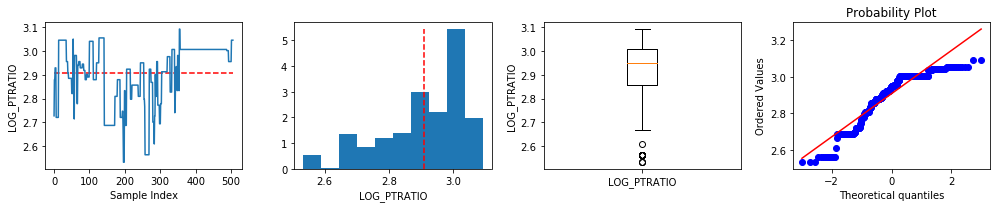

myplots LOG_PTRATIO


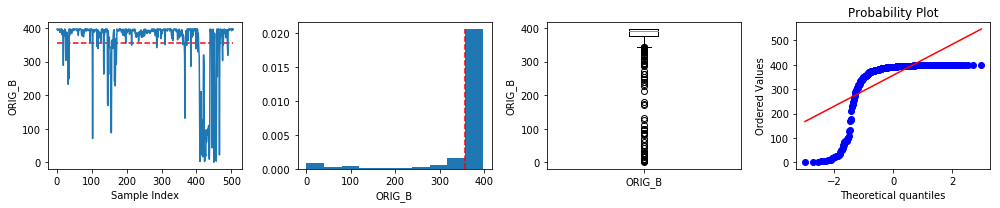

myplots ORIG_B


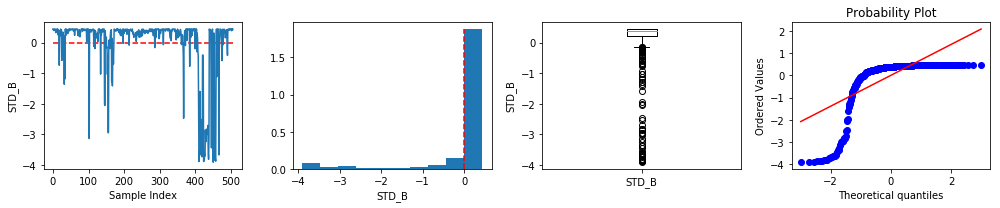

myplots STD_B


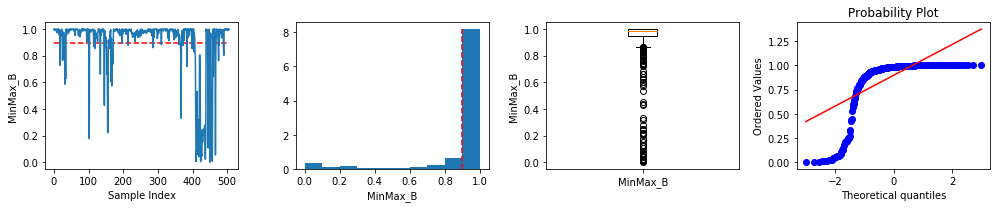

myplots MinMax_B


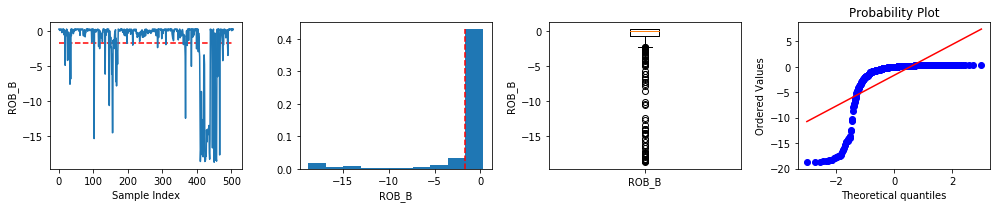

myplots ROB_B


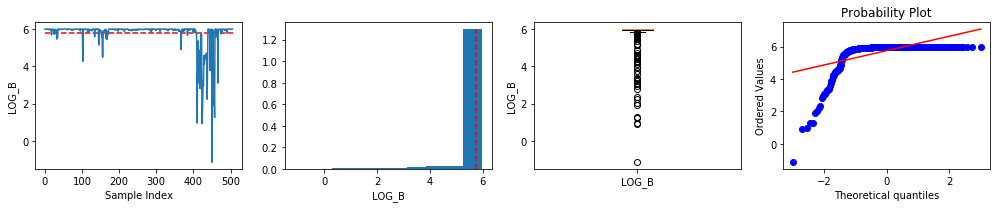

myplots LOG_B


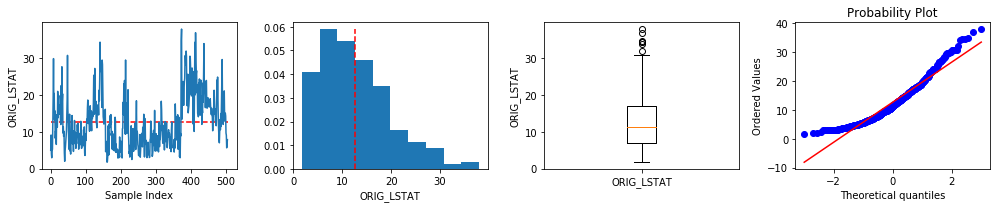

myplots ORIG_LSTAT


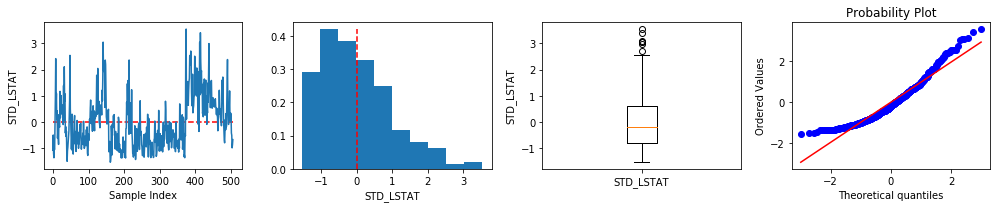

myplots STD_LSTAT


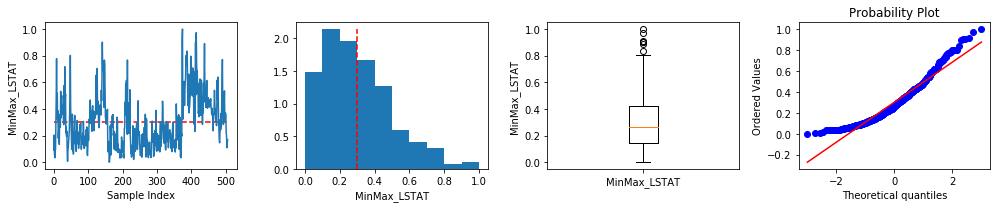

myplots MinMax_LSTAT


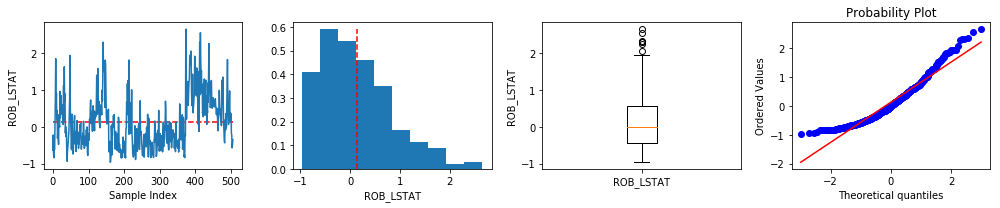

myplots ROB_LSTAT


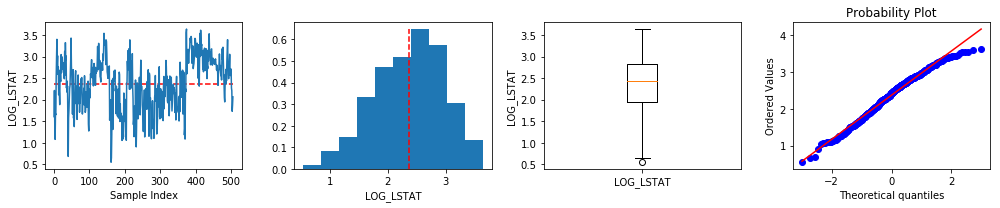

myplots LOG_LSTAT


In [29]:
"""
Compare transformations
"""
#sel = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM'|'AGE', 'DIS', 'TAX', LSTAT]
#inds = [feature_names.index(name) for name in sel]
#select_features = zip(inds, name)
for f, name in enumerate(feature_names):
    myplots(Xclean[:,f], 'ORIG_'+name)
    myplots(Xclean_std[:,f], 'STD_'+name)
    myplots(Xclean_minmax[:,f], 'MinMax_'+name)
    myplots(Xclean_robust[:,f], 'ROB_'+name)
    myplots(Xclean_log[:,f], 'LOG_'+name)

# FEATURE SELECTION
Feature selection is a core concept that can have a dramatic impact on achievable
model performance. Irrelevant or confounding features can inhibit or reduce the 
learning abilities of a model. Extracted features should be the ones that most 
effectively boost prediction of the output of interested in. "Garbage in, garbage
out". Additionally, learning using features that provide no predictive boost, can 
be computationaly expensive. Lastly, good feature subsets should be highly correlated 
with the output and uncorrelated to other features.

Main Objectives: 
1. improve predictive performance
2. improve speed and computational costs
3. improve understanding of the underlying process that generated the data


### Variance Threshold

In [30]:
""" TODO
Eliminate likely irrelevant features with lower variance scores
Zero-variance features have the same value in all samples
""" 
from sklearn.feature_selection import VarianceThreshold

var_thres = 20
sel_var = VarianceThreshold(threshold=var_thres)

Xtrans = sel_var.fit_transform(Xclean)
variances = np.array(sel_var.variances_).reshape(1,-1)
df_vars = pd.DataFrame(variances, columns=feature_names)
df_vars

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,73.84036,542.86184,46.920481,0.064385,0.013359,0.492122,788.929893,4.425252,75.229921,28348.6236,4.677726,8319.644076,50.893979


In [31]:
# TODO
selected = sel_var.get_support()
df_vars.columns[selected]

Index(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT'], dtype='object')

### Univariate Statistical Selection Using Mutual Information (MI)
Select best features based on univariate statistical tests  
Mutual Information useful for classification and regression. MI can capture 
any type of statistical dependency, but as a nonparametric measure requires
more samples. MI between two random variables is non-negative, measuring the
dependency between the variables. It is zero when two random variables are 
independent, and high for high dependency.

In [32]:
# TODO
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Selects highest MIs
sel_k = SelectKBest(mutual_info_regression, k=5)
Xtrans = sel_k.fit_transform(X, y.ravel())
mi = np.array(sel_k.scores_).reshape(1,-1)
df_mi = pd.DataFrame(mi, columns=feature_names)
df_mi

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.345869,0.170666,0.468453,0.036834,0.468466,0.530193,0.311273,0.293895,0.223987,0.357805,0.439401,0.162609,0.667143


In [33]:
# TODO
selected = sel_k.get_support()
df_Xy.columns[:nfeatures][selected]

Index(['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'], dtype='object')

### Feature Correlations

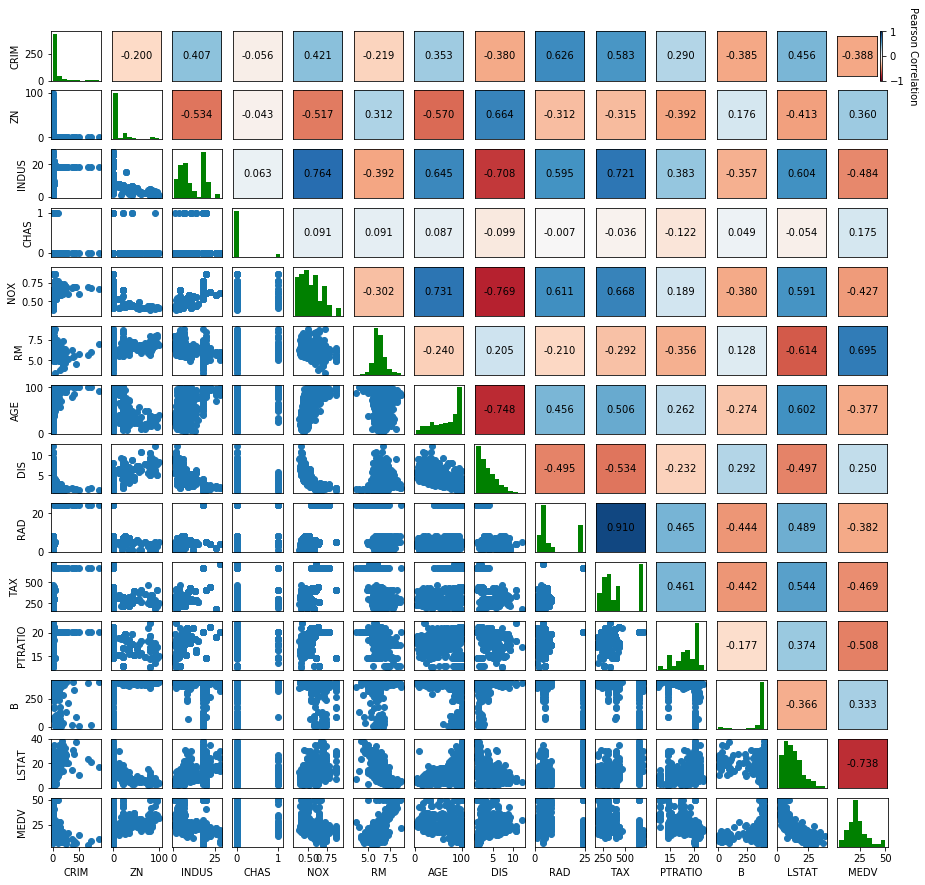

In [34]:
"""
Compute and visualize the featue correlations
"""
ncorrs = nfeatures + 1
corr_names = feature_names + [target_name]
Xycombo = np.append(X, y, axis=1)
corrs = np.corrcoef(Xycombo.T)

fig, axs = plt.subplots(nrows=ncorrs, ncols=ncorrs, figsize=(15, 15))
for f1, f1_name in enumerate(corr_names):
    for f2, f2_name in enumerate(corr_names):
        if f1 < f2:
            cr = corrs[f1, f2]
            im = axs[f1, f2].imshow(np.array([[cr, cr], [cr, cr]]), cmap='RdBu', vmin=-1, vmax=1)
            text = axs[f1, f2].text(.5, .5, "%.3f" % cr, ha="center", va="center", color="k")
        if f1 == 0 and f2 == (ncorrs - 1):
            cbar = axs[f1, f2].figure.colorbar(im, ax=axs[f1, f2])
            cbar.ax.set_ylabel("Pearson Correlation", rotation=-90, va="bottom")
            
        if f1 == f2:
            axs[f1, f2].hist(Xycombo[:, f1], color='green')
        if f1 > f2:
            axs[f1, f2].scatter(Xycombo[:, f2], Xycombo[:, f1])
            
        if f1 < (ncorrs - 1): axs[f1, f2].set_xticks([])
        if f2 > 0: axs[f1, f2].set_yticks([])
            
        if f1 == (ncorrs - 1): axs[f1, f2].set_xlabel(f2_name)
        if f2 == 0: axs[f1, f2].set_ylabel(f1_name)


In [35]:
""" TODO
We want to keep features that are highly correlated with the output 
and have a low correlation with other features
Get the last row of correlations. These are the linear correlations of
each feature with the target output.
"""
# Get the feature correlations with the target output
feature_target_corrs = corrs[-1, :-1].reshape(1,-1)
feat_targ_corr_rank = np.fliplr(np.argsort(feature_target_corrs))

corr_thres = .2
selected = feature_target_corrs.ravel() > corr_thres
df_Xy.columns[:nfeatures][selected]

Index(['ZN', 'RM', 'DIS', 'B'], dtype='object')

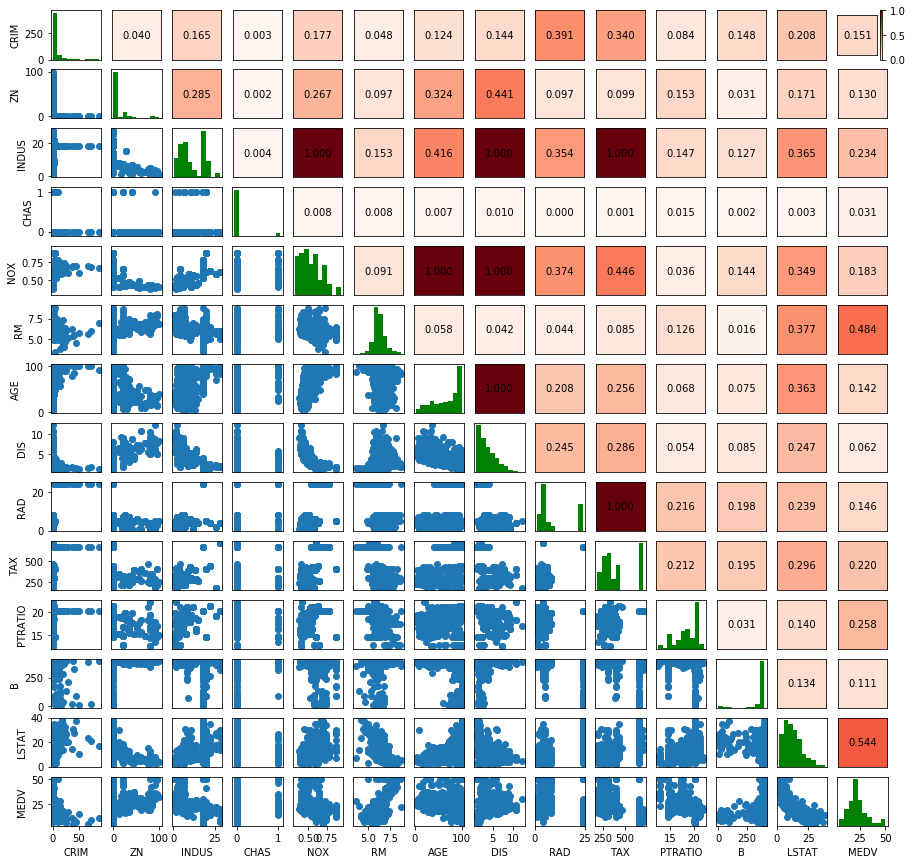

In [36]:
"""
Isolate feature correlation pairs above some threshold
"""
max_feature_corr = .49

fig, axs = plt.subplots(nrows=ncorrs, ncols=ncorrs, figsize=(15, 15))
for f1, f1_name in enumerate(corr_names):
    for f2, f2_name in enumerate(corr_names):
        if f1 < f2:
            cr = corrs[f1, f2]**2
            if cr > max_feature_corr and f2 != (ncorrs - 1): cr = 1
            im = axs[f1, f2].imshow(np.array([[cr, cr], [cr, cr]]), cmap='Reds', vmin=0, vmax=1)
            text = axs[f1, f2].text(.5, .5, "%.3f" % cr, ha="center", va="center", color="k")
            #textcolors[int(im.norm(data[i, j]) > threshold)]
        if f1 == 0 and f2 == (ncorrs - 1):
            cbar = axs[f1, f2].figure.colorbar(im, ax=axs[f1, f2])
            #cbar.ax.set_ylabel("Pearson Correlation", rotation=-90, va="bottom")
            
        if f1 == f2:
            axs[f1, f2].hist(Xycombo[:, f1], color='green')
        if f1 > f2:
            axs[f1, f2].scatter(Xycombo[:, f2], Xycombo[:, f1])
            
        if f1 < (ncorrs - 1): axs[f1, f2].set_xticks([])
        if f2 > 0: axs[f1, f2].set_yticks([])
            
        if f1 == (ncorrs - 1): axs[f1, f2].set_xlabel(f2_name)
        if f2 == 0: axs[f1, f2].set_ylabel(f1_name)


### Recursive Feature Elimination (RFE)

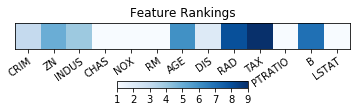

In [37]:
""" TODO
Recursive construct predictive models on feature subsets to
rank the features based on improvement to model performance.
Selected (i.e., estimated best) features are assigned rank 1.
"""
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

# Create a model
svc = SVR(kernel="linear", C=1)

# Create the RFE object and rank each pixel
rfe = RFE(estimator=svc, n_features_to_select=5, step=1)

# Run the ranking procedure
rfe.fit(X, y.ravel())
ranking = rfe.ranking_.reshape(1,-1)
max_rank = ranking.max()

# Plot rankings
fig, ax = plt.subplots()
img = ax.imshow(ranking, cmap=plt.cm.Blues)
cbar = ax.figure.colorbar(img, ax=ax, ticks=range(max_rank+1), 
                          orientation='horizontal', fraction=.03)
cbar.ax.invert_yaxis()
ax.set_yticks([])
ax.set_xticks(range(nfeatures))
ax.set_xticklabels(feature_names)
ax.set_title("Feature Rankings")
plt.setp(ax.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")
a = 1

In [38]:
et = time.time() - globalStart
print("Elapsed Time: %.02f " % (et / 60))

Elapsed Time: 1.23 
